# Baseball Data Analysis

This study investigates the [baseball dataset](http://www.seanlahman.com/baseball-archive/statistics/) and then communicate the findings about it. I use the Python libraries NumPy, Pandas, and Matplotlib to make the analysis easier. This project is a required part of Udacity Data Aanalysis Nano Degree Program.

## Database:
"The database contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2016.  It includes data from the two current leagues (American and National), the four other "major"  leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875. 

The database is comprised of the following main tables:

  __MASTER__   -  Player names, DOB, and biographical info
  
  __Batting__  -  batting statistics
  
  __Pitching__ -  pitching statistics
  
  __Fielding__ -  fielding statistics"
  
[Sean Lahman Baseball Database](http://seanlahman.com/files/database/readme2016.txt)

## Research Questions:
   __1)__ What is the relationship between different performance metrics? Do any have a strong negative or positive relationship?
   
   __2)__ What are the characteristics of baseball players with the highest salaries?
   
These general questions are answered with several sub questions within the study.

## Analysis 

First, each data set will be analyzed seperately, and then the tables will be combined for further analysis.

In [222]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Master Table Analyses

In [5]:
master = pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Master.csv")

In [6]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105 entries, 0 to 19104
Data columns (total 24 columns):
playerID        19105 non-null object
birthYear       18973 non-null float64
birthMonth      18803 non-null float64
birthDay        18656 non-null float64
birthCountry    19036 non-null object
birthState      18534 non-null object
birthCity       18925 non-null object
deathYear       9441 non-null float64
deathMonth      9440 non-null float64
deathDay        9439 non-null float64
deathCountry    9436 non-null object
deathState      9390 non-null object
deathCity       9431 non-null object
nameFirst       19068 non-null object
nameLast        19105 non-null object
nameGiven       19068 non-null object
weight          18251 non-null float64
height          18320 non-null float64
bats            17920 non-null object
throws          18126 non-null object
debut           18910 non-null object
finalGame       18910 non-null object
retroID         19049 non-null object
bbrefID        

It is clear that there exist missing values in the master dataset. There exist 24 columns and 19105 rows in the dataset. 8 columns are numeric and the remaining 16 columns are non-numeric. 

Should playerID be the index?

In [7]:
len(master["playerID"].unique())

19105

In [8]:
master = pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Master.csv", index_col = 'playerID')

In [9]:
master.head()


,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [10]:
# fix datatypes converting objects to dates
master['debut']= pd.to_datetime(master['debut'])
master['finalGame']= pd.to_datetime(master['finalGame'])

In [11]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19105 entries, aardsda01 to zychto01
Data columns (total 23 columns):
birthYear       18973 non-null float64
birthMonth      18803 non-null float64
birthDay        18656 non-null float64
birthCountry    19036 non-null object
birthState      18534 non-null object
birthCity       18925 non-null object
deathYear       9441 non-null float64
deathMonth      9440 non-null float64
deathDay        9439 non-null float64
deathCountry    9436 non-null object
deathState      9390 non-null object
deathCity       9431 non-null object
nameFirst       19068 non-null object
nameLast        19105 non-null object
nameGiven       19068 non-null object
weight          18251 non-null float64
height          18320 non-null float64
bats            17920 non-null object
throws          18126 non-null object
debut           18910 non-null datetime64[ns]
finalGame       18910 non-null datetime64[ns]
retroID         19049 non-null object
bbrefID         19103 non-null 

In [12]:
master.head()

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,
aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


__Question__: What is the first debut date of players? How many player were in that day?

In [13]:
sorted_master = master.sort_values(['debut'])

In [14]:
first_debut = sorted_master['debut'].min()

In [15]:
first_debut

Timestamp('1871-05-04 00:00:00')

In [16]:
first_players = master[master['debut']==first_debut]

In [17]:
first_players2 = first_players.copy()
print(len(first_players2))

18


Total number of players in the first day was __18__ !

__Question__: How long did the first players play in the league?

In [18]:
lenght_of_play = first_players2['finalGame'] - first_players2['debut']

In [19]:
lenght_of_play

playerID
allisar01   1981 days
bassjo01    2300 days
careyto01   3070 days
carleji01    384 days
foranji01    117 days
goldswa01   1502 days
kellybi01    117 days
kimbage01    146 days
lennobi01    799 days
mathebo01   6003 days
mcderjo01    429 days
minched01    419 days
paborch01   1638 days
prattal01    473 days
selmafr01   1460 days
suttoez01   6257 days
whitede01   7093 days
whiteel01    146 days
dtype: timedelta64[ns]

In [20]:
first_players2['lenght_of_play'] = lenght_of_play

In [21]:
first_players2.sort_values(['lenght_of_play'], ascending = False)

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,lenght_of_play
playerID,,,,,,,,,,,,,,,,,,,,,
whitede01,1847.0,12.0,2.0,USA,NY,Caton,1939.0,7.0,7.0,USA,...,James Laurie,175.0,71.0,L,R,1871-05-04,1890-10-04,whitd102,whitede01,7093 days
suttoez01,1849.0,9.0,17.0,USA,NY,Seneca Falls,1907.0,6.0,20.0,USA,...,Ezra Ballou,153.0,68.0,R,R,1871-05-04,1888-06-20,sutte101,suttoez01,6257 days
mathebo01,1851.0,11.0,21.0,USA,MD,Baltimore,1898.0,4.0,17.0,USA,...,Robert T.,140.0,65.0,R,R,1871-05-04,1887-10-10,mathb101,mathebo01,6003 days
careyto01,1846.0,11.0,2.0,USA,NY,Brooklyn,1906.0,8.0,16.0,USA,...,Thomas Joseph,145.0,68.0,R,R,1871-05-04,1879-09-29,caret101,careyto01,3070 days
bassjo01,1848.0,NaN,NaN,USA,MD,Charleston,1888.0,9.0,25.0,USA,...,John Elias,150.0,66.0,NaN,NaN,1871-05-04,1877-08-20,bassj101,bassjo01,2300 days
allisar01,1849.0,1.0,29.0,USA,PA,Philadelphia,1916.0,2.0,25.0,USA,...,Arthur Algernon,150.0,68.0,NaN,NaN,1871-05-04,1876-10-05,allia101,allisar01,1981 days
paborch01,1846.0,9.0,24.0,USA,NY,Brooklyn,1913.0,4.0,23.0,USA,...,Charles Henry,155.0,68.0,L,L,1871-05-04,1875-10-28,paboc101,paborch01,1638 days
goldswa01,1848.0,10.0,NaN,USA,MD,Baltimore,1915.0,9.0,16.0,USA,...,Warren M.,146.0,67.0,NaN,NaN,1871-05-04,1875-06-14,goldw101,goldswa01,1502 days
selmafr01,1851.0,1.0,21.0,USA,MD,Baltimore,1907.0,5.0,6.0,USA,...,Charles Francis,145.0,69.0,NaN,NaN,1871-05-04,1875-05-03,selmf101,selmafr01,1460 days


In [22]:
first_players2['lenght_of_play'].max()

Timedelta('7093 days 00:00:00')

The longest 'first player' played in 7093 day time interval in total.

__Question__: What is the average length of play of the players?

In [23]:
#Due to mutability issues, I have copied the master table and added a new column
master_full = master.copy()
length_of_play = master['finalGame'] - master['debut']
master_full['length_of_play'] = length_of_play

In [24]:
# number of null debut cells
len(master_full['debut'][pd.isnull(master_full['debut'])])

195

Since there exist only 195 missing debut number, I will drop them and make the analysis accordingly

In [25]:
# Drop the row if debut is missing
master_cleaned_debuts = master_full.dropna(subset =['debut'])

In [26]:
len(master_cleaned_debuts)

18910

In [27]:
master_cleaned_debuts['length_of_play'].describe()

count                        18910
mean     1761 days 21:48:15.610787
std      1832 days 17:33:00.130746
min              -4 days +00:00:00
25%              138 days 00:00:00
50%             1163 days 00:00:00
75%             2931 days 00:00:00
max            12862 days 00:00:00
Name: length_of_play, dtype: object

There seems to be problem since there exist data points where debut is later than finalGame. Let's find it.

In [28]:
master_cleaned_debuts[master_cleaned_debuts['debut'] > master_cleaned_debuts['finalGame']]

,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,length_of_play
playerID,,,,,,,,,,,,,,,,,,,,,
menzete01,1897.0,11.0,4.0,USA,MO,St. Louis,1969.0,12.0,23.0,USA,...,Theodore Charles,172.0,69.0,R,R,1918-04-27,1918-04-23,menzt101,menzete01,-4 days


In [29]:
master_cleaned_debuts = master_cleaned_debuts.drop('menzete01')

In [30]:
master_cleaned_debuts['length_of_play'].describe()

count                        18909
mean     1762 days 00:02:44.493098
std      1832 days 17:37:59.704421
min                0 days 00:00:00
25%              138 days 00:00:00
50%             1163 days 00:00:00
75%             2931 days 00:00:00
max            12862 days 00:00:00
Name: length_of_play, dtype: object

In [31]:
master_cleaned_debuts[['nameGiven', 'nameLast','length_of_play']].sort_values('length_of_play',ascending = False)


,nameGiven,nameLast,length_of_play
playerID,,,
altroni01,Nicholas,Altrock,12862 days
orourji01,James Henry,O'Rourke,11836 days
minosmi01,Saturnino Orestes Armas,Minoso,11492 days
olearch01,Charles Timothy,O'Leary,11126 days
lathaar01,Walter Arlington,Latham,10678 days
mcguide01,James Thomas,McGuire,10192 days
jennihu01,Hugh Ambrose,Jennings,9954 days
eversjo01,John Joseph,Evers,9897 days
ryanno01,Lynn Nolan,Ryan,9873 days


In [32]:
len(master_cleaned_debuts[master_cleaned_debuts['length_of_play'] == '0 days'])

1009

On Average, a player played 1762 days in the league. There exist several players who appeared just once (1009). The player'Nicholas Altrock' played 12862 days, which is more than 35 years.

__Question__: What portion of players used different hands for batting and throwing?

In [33]:
master_hands = master.copy()

In [34]:
master_hands = master_hands.dropna(subset =[['bats', 'throws']])

In [35]:
# Total number of non-null batting and throwing rows
x = len(pd.isnull(master_hands[['bats', 'throws']]))

In [36]:
# Check if there exist Null cells
master_hands[master_hands['bats']=='Nan']
master_hands[master_hands['throws']=='Nan']



,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,


In [37]:
# Different hand users
y = len(master_hands[((master_hands['bats']=='R') & (master_hands['throws'] == 'L')) | 
             ((master_hands['bats']=='L') & (master_hands['throws'] == 'R'))] )


In [38]:
# Fraction of different hand users
y/x

0.14975275342773656

15% of all the players use different hands for throwing and batting

### Salary Table Analysis

In [39]:
salary = pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Salaries.csv", index_col ='playerID')


In [40]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26428 entries, barkele01 to zimmery01
Data columns (total 4 columns):
yearID    26428 non-null int64
teamID    26428 non-null object
lgID      26428 non-null object
salary    26428 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


In [41]:
salary.head()

,yearID,teamID,lgID,salary
playerID,,,,
barkele01,1985,ATL,NL,870000
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000


In [42]:
salary.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


In [43]:
# Is there any missing data?
salary.isnull().any()

yearID    False
teamID    False
lgID      False
salary    False
dtype: bool

There exist no missing data in salary table.

In [44]:
# Lets check the extreme salaries 
salary.sort_values('salary').head(10)

,yearID,teamID,lgID,salary
playerID,,,,
jamesdi01,1993,NYA,AL,0
martija02,1999,PIT,NL,0
silveda01,1993,NYA,AL,10900
carych01,1994,CHA,AL,50000
penaal01,1997,FLO,NL,50000
cluttbr01,1986,ML4,AL,60000
loyndmi01,1986,TEX,AL,60000
soffra01,1986,SLN,NL,60000
mathegr01,1986,SLN,NL,60000


In [45]:
salary.sort_values('salary', ascending =False).head(10)

,yearID,teamID,lgID,salary
playerID,,,,
kershcl01,2016,LAD,NL,33000000
rodrial01,2009,NYA,AL,33000000
rodrial01,2010,NYA,AL,33000000
kershcl01,2015,LAN,NL,32571000
rodrial01,2011,NYA,AL,32000000
greinza01,2016,ARI,NL,31799030
priceda01,2016,BOS,AL,30000000
rodrial01,2012,NYA,AL,30000000
rodrial01,2013,NYA,AL,29000000


There seems to be a problem. Two players have 0 salary. Let's drop them

In [46]:
salary_cleaned = salary.drop(['jamesdi01', 'martija02'])

In [47]:
salary_cleaned.sort_values('salary').head(10)

,yearID,teamID,lgID,salary
playerID,,,,
silveda01,1993,NYA,AL,10900
penaal01,1997,FLO,NL,50000
carych01,1994,CHA,AL,50000
stewada01,1986,OAK,AL,60000
spilmha01,1986,DET,AL,60000
slatoji01,1986,DET,AL,60000
kinger01,1986,DET,AL,60000
yettri01,1986,CLE,AL,60000
birtsti01,1985,OAK,AL,60000


In [48]:
salary_cleaned.sort_values('salary', ascending = False).head(10)

,yearID,teamID,lgID,salary
playerID,,,,
rodrial01,2009,NYA,AL,33000000
kershcl01,2016,LAD,NL,33000000
rodrial01,2010,NYA,AL,33000000
kershcl01,2015,LAN,NL,32571000
rodrial01,2011,NYA,AL,32000000
greinza01,2016,ARI,NL,31799030
rodrial01,2012,NYA,AL,30000000
priceda01,2016,BOS,AL,30000000
rodrial01,2013,NYA,AL,29000000


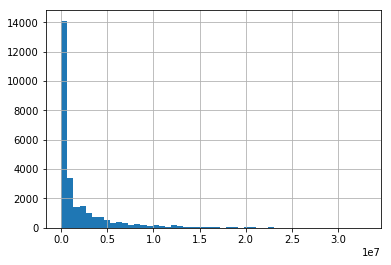

In [49]:
salary_cleaned['salary'].hist(bins=50)

It seems salary comparison for a 30-year of period needs inflation adjustment. Let's investigate last 3 years first.

__Question__: What is the yearly average salary of the players?

In [50]:
sorted_annual_average_salaries = salary_cleaned.groupby('yearID').mean().sort_values('salary', ascending=False)

In [51]:
sorted_annual_average_salaries.head(10)


,salary
yearID,
2016,4.396410e+06
2015,4.301276e+06
2014,3.980446e+06
2013,3.723344e+06
2012,3.458421e+06
2011,3.318838e+06
2010,3.278747e+06
2009,3.277647e+06
2008,3.136517e+06


In the last 5 years, average salaries passed 3.4 million USD

__Question__ : What is the salary distribution for the last 3 years?

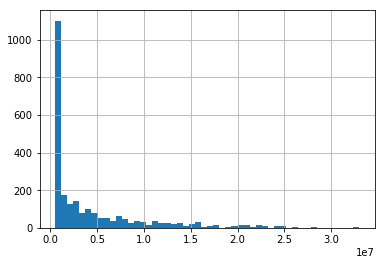

In [52]:
salary_cleaned[salary_cleaned['yearID'] > 2013]['salary'].hist(bins = 50)

It seems that, for the last 3 years, most players earned less than half million. 
However, there exis few players who earn more than 2.5 million.
If we look at the top 10 salaries and the lowest 10 salaries, we will have a better idea about salary distribution.

In [53]:
salary_cleaned[salary_cleaned['yearID'] > 2013].sort_values('salary', ascending =False).head(10)

,yearID,teamID,lgID,salary
playerID,,,,
kershcl01,2016,LAD,NL,33000000
kershcl01,2015,LAN,NL,32571000
greinza01,2016,ARI,NL,31799030
priceda01,2016,BOS,AL,30000000
cabremi01,2016,DET,AL,28000000
verlaju01,2016,DET,AL,28000000
verlaju01,2015,DET,AL,28000000
cespeyo01,2016,NYM,NL,27328046
greinza01,2014,LAN,NL,26000000


In [54]:
salary_cleaned[salary_cleaned['yearID'] > 2013].sort_values('salary', ascending =True).head(10)

,yearID,teamID,lgID,salary
playerID,,,,
hamilbi02,2014,CIN,NL,500000
johnser04,2014,CHA,AL,500000
wheelry01,2014,COL,NL,500000
herreel01,2014,MIL,NL,500000
herrmch01,2014,MIN,AL,500000
donaljo02,2014,OAK,AL,500000
rufda01,2014,PHI,NL,500000
handbr01,2014,MIA,NL,500000
ascheco01,2014,PHI,NL,500000


In [55]:
salary_cleaned[salary_cleaned['yearID'] > 2013].describe()

,yearID,salary
count,2472.000000,2.472000e+03
mean,2015.020631,4.230015e+06
std,0.818134,5.537272e+06
min,2014.000000,5.000000e+05
25%,2014.000000,5.186500e+05
50%,2015.000000,1.550000e+06
75%,2016.000000,5.700000e+06
max,2016.000000,3.300000e+07


In [56]:
salary_cleaned[salary_cleaned['yearID'] > 2013].median()

yearID       2015.0
salary    1550000.0
dtype: float64

Although the median salary in the last 3 years is 1.55 million, due to extreme earners, 
mean is 4.23 million dollars. Therefore, the distribution of salaries is positively skewed.

### __Question__: What are the characteristics of baseball players with the highest salaries?


Without the inflation and other extranous factors, it is difficult to compare the salaries of different players. However, we may investigate the players with the highest income and the players with the lowest income of each year and compare their characteristics. First, let's take a look at some descriptive characteristics

In [57]:
salary.head()

,yearID,teamID,lgID,salary
playerID,,,,
barkele01,1985,ATL,NL,870000
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000


In [58]:
salary.groupby('yearID').mean().head(10)

,salary
yearID,
1985,4.762994e+05
1986,4.171470e+05
1987,4.347295e+05
1988,4.531711e+05
1989,5.063231e+05
1990,5.119737e+05
1991,8.949612e+05
1992,1.047521e+06
1993,9.769666e+05


In [59]:
salary.groupby('yearID').median().head(10)

,salary
yearID,
1985,400000
1986,294404
1987,285000
1988,295000
1989,300000
1990,250000
1991,500000
1992,430000
1993,300000


In [60]:
salary.groupby('yearID').std().head(10)

,salary
yearID,
1985,3.433209e+05
1986,3.940176e+05
1987,4.311822e+05
1988,4.531581e+05
1989,5.380454e+05
1990,5.524405e+05
1991,9.398494e+05
1992,1.180646e+06
1993,1.284734e+06


It is clearly seen that the distribution of the data is positively skewed. There exist so many extreme values to pull the median above the mean. There exist also high variability in data.

Firstly, I will make an __Outlier analysis__ to exclude outliers from the dataset. 

### Outlier Analysis

In [61]:
yearly_salary_median = salary_cleaned.groupby('yearID').median()

In [62]:
yearly_salary_median.head()

,salary
yearID,
1985,400000
1986,294404
1987,286250
1988,292500
1989,300000


In [63]:
yearly_salary_quartile1 = salary_cleaned.groupby('yearID').quantile(0.25)

In [64]:
yearly_salary_quartile3 = salary_cleaned.groupby('yearID').quantile(0.75)

In [65]:
upper_limit = (yearly_salary_median) + 1.5 *(yearly_salary_quartile3 - yearly_salary_quartile1)
lower_limit  = (yearly_salary_median) - 1.5 *(yearly_salary_quartile3 - yearly_salary_quartile1)

In [66]:
merged_upper_lower = upper_limit.merge(lower_limit, left_index =True, right_index = True )

In [67]:
salary_cleaned_copy = salary_cleaned.copy()

In [68]:
merged_salary = pd.merge(salary_cleaned_copy, merged_upper_lower, right_index =True, left_on ='yearID')

In [69]:
merged_salary.head()

,yearID,teamID,lgID,salary,salary_x,salary_y
playerID,,,,,,
barkele01,1985,ATL,NL,870000,1066562.5,-266562.5
bedrost01,1985,ATL,NL,550000,1066562.5,-266562.5
benedbr01,1985,ATL,NL,545000,1066562.5,-266562.5
campri01,1985,ATL,NL,633333,1066562.5,-266562.5
ceronri01,1985,ATL,NL,625000,1066562.5,-266562.5


In [70]:
merged_salary.rename(columns={'salary_x': 'upper_limit', 'salary_y': 'lower_limit' }, inplace=True)



Lets drop the outliers each year. We will investigate the outliers.I will create two seperate dataframes for low outliers and high outliers to investigate their characteristics.

In [71]:
high_outliers = merged_salary[merged_salary['salary'] > merged_salary['upper_limit']]

In [72]:
high_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3907 entries, hornebo01 to zimmery01
Data columns (total 6 columns):
yearID         3907 non-null int64
teamID         3907 non-null object
lgID           3907 non-null object
salary         3907 non-null int64
upper_limit    3907 non-null float64
lower_limit    3907 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 213.7+ KB


There exist 3907 outliers. This is too many. I will investigate them seperately.

In [73]:
low_outliers = merged_salary[merged_salary['salary'] < merged_salary['lower_limit']]

In [74]:
low_outliers.head()

,yearID,teamID,lgID,salary,upper_limit,lower_limit
playerID,,,,,,


There exist no low outliers. It seems, there exist so many variability in data and there exist extreme priced players and the majority of players earn similar amounts. 

In [75]:
merged_salary_outliers_cleaned = merged_salary[(merged_salary['salary'] < merged_salary['upper_limit'])]

In [76]:
merged_salary_outliers_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22512 entries, barkele01 to treinbl01
Data columns (total 6 columns):
yearID         22512 non-null int64
teamID         22512 non-null object
lgID           22512 non-null object
salary         22512 non-null int64
upper_limit    22512 non-null float64
lower_limit    22512 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ MB


In [77]:
merged_salary_outliers_cleaned.head()

,yearID,teamID,lgID,salary,upper_limit,lower_limit
playerID,,,,,,
barkele01,1985,ATL,NL,870000,1066562.5,-266562.5
bedrost01,1985,ATL,NL,550000,1066562.5,-266562.5
benedbr01,1985,ATL,NL,545000,1066562.5,-266562.5
campri01,1985,ATL,NL,633333,1066562.5,-266562.5
ceronri01,1985,ATL,NL,625000,1066562.5,-266562.5


In [78]:
yearly_salary_std = merged_salary_outliers_cleaned[['salary', 'yearID']].groupby('yearID').std()

In [79]:
yearly_salary_mean= merged_salary_outliers_cleaned[['salary', 'yearID']].groupby('yearID').mean()

In [80]:
merged_mean_std = pd.merge(yearly_salary_mean, yearly_salary_std, right_index = True, left_index =True, suffixes =['_mean', '_std'] )

In [81]:
merged_mean_std.head()

,salary_mean,salary_std
yearID,,
1985,416316.922179,255228.117511
1986,360368.574074,300458.540803
1987,356007.517949,310760.995539
1988,363543.068182,310357.059702
1989,367234.985938,326974.793725


In [82]:
merged_salary_outliers_cleaned_copy = merged_salary_outliers_cleaned.copy()

In [83]:
merged_salary_full = pd.merge(merged_salary_outliers_cleaned_copy, merged_mean_std, right_index = True, left_on = 'yearID')

In [84]:
#Outliers are cleaned and mean and std is added yearly
merged_salary_full.head()

,yearID,teamID,lgID,salary,upper_limit,lower_limit,salary_mean,salary_std
playerID,,,,,,,,
barkele01,1985,ATL,NL,870000,1066562.5,-266562.5,416316.922179,255228.117511
bedrost01,1985,ATL,NL,550000,1066562.5,-266562.5,416316.922179,255228.117511
benedbr01,1985,ATL,NL,545000,1066562.5,-266562.5,416316.922179,255228.117511
campri01,1985,ATL,NL,633333,1066562.5,-266562.5,416316.922179,255228.117511
ceronri01,1985,ATL,NL,625000,1066562.5,-266562.5,416316.922179,255228.117511


In [85]:
high_outliers.head()

,yearID,teamID,lgID,salary,upper_limit,lower_limit
playerID,,,,,,
hornebo01,1985,ATL,NL,1500000,1066562.5,-266562.5
murphda05,1985,ATL,NL,1625000,1066562.5,-266562.5
suttebr01,1985,ATL,NL,1354167,1066562.5,-266562.5
lynnfr01,1985,BAL,AL,1090000,1066562.5,-266562.5
murraed02,1985,BAL,AL,1472819,1066562.5,-266562.5


In [86]:
yearly_salary_std_outliers = high_outliers[['salary', 'yearID']].groupby('yearID').std()

In [87]:
yearly_salary_mean_outliers = high_outliers[['salary', 'yearID']].groupby('yearID').mean()

In [88]:
merged_mean_std_outliers = pd.merge(yearly_salary_mean_outliers, yearly_salary_std_outliers, right_index = True, left_index =True, suffixes =['_mean', '_std'] )

In [89]:
high_outliers_copy = high_outliers.copy()

In [90]:
outlier_merged_salary = pd.merge(high_outliers_copy, merged_mean_std_outliers, right_index = True, left_on = 'yearID')

In [91]:
outlier_merged_salary.head()

,yearID,teamID,lgID,salary,upper_limit,lower_limit,salary_mean,salary_std
playerID,,,,,,,,
hornebo01,1985,ATL,NL,1500000,1066562.5,-266562.5,1.332717e+06,294673.655658
murphda05,1985,ATL,NL,1625000,1066562.5,-266562.5,1.332717e+06,294673.655658
suttebr01,1985,ATL,NL,1354167,1066562.5,-266562.5,1.332717e+06,294673.655658
lynnfr01,1985,BAL,AL,1090000,1066562.5,-266562.5,1.332717e+06,294673.655658
murraed02,1985,BAL,AL,1472819,1066562.5,-266562.5,1.332717e+06,294673.655658


Now, lets compare the differences bewteen means and std's of outliers and the remaining groups yearly.

In [92]:
comparison_table = pd.merge(merged_mean_std, merged_mean_std_outliers, 
                            right_index = True, left_index = True, suffixes=('', '_outliers'))

In [93]:
comparison_table

,salary_mean,salary_std,salary_mean_outliers,salary_std_outliers
yearID,,,,
1985,4.163169e+05,2.552281e+05,1.332717e+06,2.946737e+05
1986,3.603686e+05,3.004585e+05,1.524327e+06,3.681033e+05
1987,3.560075e+05,3.107610e+05,1.565634e+06,3.092465e+05
1988,3.635431e+05,3.103571e+05,1.655432e+06,3.418401e+05
1989,3.672350e+05,3.269748e+05,1.779505e+06,4.057745e+05
1990,3.469051e+05,3.125222e+05,1.733423e+06,3.884571e+05
1991,6.382687e+05,6.255712e+05,2.892556e+06,4.528601e+05
1992,7.422752e+05,7.868764e+05,3.644602e+06,6.614697e+05
1993,4.345855e+05,4.879200e+05,3.347680e+06,9.527138e+05


There exist a huge difference between the mean salaries of outliers and the remaining. 
There exist no trends for std of the groups. However, generally std of the outliers are higher than std of normal group.

Now, lets invetsigate top outliers. For this purpose, I will normalize the salaries in each year and then choose the ones well above the mean. 

### Normalization

In [94]:
normalized_salaries_outliers = (outlier_merged_salary['salary'] - outlier_merged_salary['salary_mean'])/outlier_merged_salary['salary_std']

In [95]:
outlier_merged_salary['normalized_salary'] = normalized_salaries_outliers

In [96]:
outlier_merged_salary.head()

,yearID,teamID,lgID,salary,upper_limit,lower_limit,salary_mean,salary_std,normalized_salary
playerID,,,,,,,,,
hornebo01,1985,ATL,NL,1500000,1066562.5,-266562.5,1.332717e+06,294673.655658,0.567690
murphda05,1985,ATL,NL,1625000,1066562.5,-266562.5,1.332717e+06,294673.655658,0.991888
suttebr01,1985,ATL,NL,1354167,1066562.5,-266562.5,1.332717e+06,294673.655658,0.072794
lynnfr01,1985,BAL,AL,1090000,1066562.5,-266562.5,1.332717e+06,294673.655658,-0.823679
murraed02,1985,BAL,AL,1472819,1066562.5,-266562.5,1.332717e+06,294673.655658,0.475449


In [97]:
# Top of tops above 3 sd of the outlier mean.
top_of_tops = outlier_merged_salary[outlier_merged_salary['normalized_salary'] > 3][['yearID', 'teamID', 'lgID', 'salary', 'normalized_salary']]

In [98]:
top_of_tops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, fostege01 to kershcl01
Data columns (total 5 columns):
yearID               36 non-null int64
teamID               36 non-null object
lgID                 36 non-null object
salary               36 non-null int64
normalized_salary    36 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ KB


In [99]:
top_of_tops.head()

,yearID,teamID,lgID,salary,normalized_salary
playerID,,,,,
fostege01,1986,NYN,NL,2800000,3.465530
yountro01,1990,ML4,AL,3200000,3.775389
bonilbo01,1992,NYN,NL,6100000,3.712034
bonilbo01,1994,NYN,NL,6300000,3.216959
fieldce01,1995,DET,AL,9237500,3.594224


I could directly normalize the salaries and choose the tops accordingly, but, I wanted to show the skewness of the distribution and make practice for __outlier analysis__. Normalization helped me to discover the players' place within the other players in the same season. I also wanted to make practices on __merging tables__ and __groupby__ operations.

__Sub Question__: Who is the highest paid player ever compared to other players in a season?


In [100]:
top_of_tops_master= pd.merge(top_of_tops, master, how ='left', left_index = True, right_index =True, suffixes = ('','_master'))

In [101]:
top_of_tops_master.head()

,yearID,teamID,lgID,salary,normalized_salary,birthYear,birthMonth,birthDay,birthCountry,birthState,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
playerID,,,,,,,,,,,,,,,,,,,,,
belleal01,1997,CHA,AL,10000000,3.493497,1966.0,8.0,25.0,USA,LA,...,Belle,Albert Jojuan,190.0,73.0,R,R,1989-07-15,2000-10-01,bellj002,belleal01
belleal01,1999,BAL,AL,11949794,3.406077,1966.0,8.0,25.0,USA,LA,...,Belle,Albert Jojuan,190.0,73.0,R,R,1989-07-15,2000-10-01,bellj002,belleal01
bondsba01,1996,SFN,NL,8416667,3.022287,1964.0,7.0,24.0,USA,CA,...,Bonds,Barry Lamar,185.0,73.0,L,L,1986-05-30,2007-09-26,bondb001,bondsba01
bondsba01,2005,SFN,NL,22000000,3.333631,1964.0,7.0,24.0,USA,CA,...,Bonds,Barry Lamar,185.0,73.0,L,L,1986-05-30,2007-09-26,bondb001,bondsba01
bonilbo01,1992,NYN,NL,6100000,3.712034,1963.0,2.0,23.0,USA,NY,...,Bonilla,Roberto Martin Antonio,210.0,75.0,B,R,1986-04-09,2001-10-07,bonib001,bonilbo01


In [102]:
top_of_tops_master.sort_values('normalized_salary', ascending=False).head(3)[['nameLast', 'nameGiven', 'salary', 'yearID']]

,nameLast,nameGiven,salary,yearID
playerID,,,,
sheffga01,Sheffield,Gary Antonian,14936667,1998
rodrial01,Rodriguez,Alexander Enmanuel,33000000,2009
rodrial01,Rodriguez,Alexander Enmanuel,22000000,2001


 __Gary Antonian Sheffield__ is the highest paid player ever with the salary of 14,936,667 in 1998. The second highest paid player is __Alexander Enmanuel Rodriguez__ with an amount of 33,000,000 in 2009.

__Sub Question__: How many unique players are there in the top of tops lists?

In [103]:
len(top_of_tops.index.unique())

14

In [104]:
top_of_tops.index.unique()

Index(['fostege01', 'yountro01', 'bonilbo01', 'fieldce01', 'bondsba01',
       'belleal01', 'sheffga01', 'brownke01', 'rodrial01', 'delgaca01',
       'ramirma02', 'giambja01', 'jeterde01', 'kershcl01'],
      dtype='object', name='playerID')

There exist 14 unique players.

__Sub Question__: Who has entered the list most?

In [105]:
top_of_tops_master[['salary','nameLast', 'nameGiven']].reindex().groupby(['playerID', 'nameLast', 'nameGiven']).count().sort_values('salary', ascending=False)

,,,salary
playerID,nameLast,nameGiven,
rodrial01,Rodriguez,Alexander Enmanuel,13
ramirma02,Ramirez,Manuel Aristides,4
fieldce01,Fielder,Cecil Grant,3
belleal01,Belle,Albert Jojuan,2
bondsba01,Bonds,Barry Lamar,2
bonilbo01,Bonilla,Roberto Martin Antonio,2
giambja01,Giambi,Jason Gilbert,2
kershcl01,Kershaw,Clayton Edward,2
brownke01,Brown,James Kevin,1


Although Alexander Enmanuel Rodriguez was not highest ever paid player, he has been an 'extremely paid player' for many seasons.

__Sub Question__: Which states were the home of top of tops?

In [106]:
top_of_tops_master[['salary', 'birthState']].reindex().groupby(['birthState', 'playerID']).count()

salary
birthState        playerID         
AL                fostege01       1
CA                bondsba01       2
                  fieldce01       3
                  giambja01       2
Distrito Nacional ramirma02       4
FL                sheffga01       1
GA                brownke01       1
IL                yountro01       1
LA                belleal01       2
NJ                jeterde01       1
NY                bonilbo01       2
                  rodrial01      13
TX                kershcl01       2

California was the home of 3 players while NY were the home of 2.

### Performance Analyses

In [107]:
batting = pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Batting.csv", index_col = 'playerID')

In [126]:
pitching =pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Pitching.csv", index_col = 'playerID')

In [109]:
fielding = pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Fielding.csv", index_col = 'playerID')

In [110]:
batting.head()

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


__Question__: What is the relationship between homeruns by batters and wins?

I will get winning info from teams table and HR by batters from batting table

In [141]:
teams = pd.read_csv("/Users/isatuncman/Documents/Udacity/udacity-analysis-projects/baseball-data-analysis/baseballdatabank-2017.1/core/Teams.csv", index_col = 'teamID')

In [142]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, BS1 to WAS
Data columns (total 47 columns):
yearID            2835 non-null int64
lgID              2785 non-null object
franchID          2835 non-null object
divID             1318 non-null object
Rank              2835 non-null int64
G                 2835 non-null int64
Ghome             2436 non-null float64
W                 2835 non-null int64
L                 2835 non-null int64
DivWin            1290 non-null object
WCWin             654 non-null object
LgWin             2807 non-null object
WSWin             2478 non-null object
R                 2835 non-null int64
AB                2835 non-null int64
H                 2835 non-null int64
2B                2835 non-null int64
3B                2835 non-null int64
HR                2835 non-null int64
BB                2835 non-null int64
SO                2715 non-null float64
SB                2691 non-null float64
CS                1976 non-null float64
HBP      

In [143]:
teams.tail()

,yearID,lgID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
teamID,,,,,,,,,,,,,,,,,,,,,
SLN,2016,NL,STL,C,2,162,81.0,86,76,N,...,169.0,0.983,St. Louis Cardinals,Busch Stadium III,3444490.0,100,99,STL,SLN,SLN
TBA,2016,AL,TBD,E,5,162,81.0,68,94,N,...,129.0,0.984,Tampa Bay Rays,Tropicana Field,1286163.0,93,94,TBR,TBA,TBA
TEX,2016,AL,TEX,W,1,162,81.0,95,67,Y,...,190.0,0.984,Texas Rangers,Rangers Ballpark in Arlington,2710402.0,106,105,TEX,TEX,TEX
TOR,2016,AL,TOR,E,2,162,81.0,89,73,N,...,144.0,0.986,Toronto Blue Jays,Rogers Centre,3392099.0,111,110,TOR,TOR,TOR
WAS,2016,NL,WSN,E,1,162,81.0,95,67,Y,...,142.0,0.988,Washington Nationals,Nationals Park,2481938.0,100,98,WSN,MON,WAS


In [144]:
batting_hr = batting.groupby('teamID')['HR'].sum()

In [145]:
batting_hr.head()

teamID
ALT       2
ANA    1324
ARI    3177
ATL    7657
BAL    9845
Name: HR, dtype: int64

In [151]:
teams_w = teams.reindex().groupby('teamID')['W'].sum()

In [152]:
teams_w.head()

teamID
ALT       6
ANA     664
ARI    1503
ATL    4174
BAL    5130
Name: W, dtype: int64

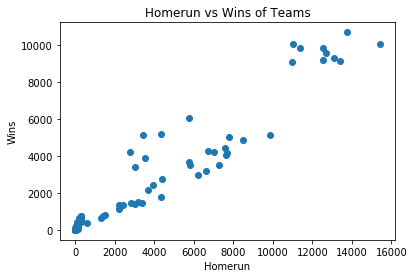

In [158]:
plt.scatter(batting_hr, teams_w)
plt.title("Homerun vs Wins of Teams")
plt.xlabel("Homerun")
plt.ylabel("Wins")
plt.show()

Here, we can see that there is a highly linear relationship between homeruns and wins. However, there exist some teams with much higher win numbers compared to the same level homeruns.

__Question__: What is the relationship between average normalized salaries of the players in a year and the teams Win performance? 

First, I will normalize all salary table and get salaries of all players for each year. Then, I will get avereages for each team.

In [159]:
merged_salary_full.head()

,yearID,teamID,lgID,salary,upper_limit,lower_limit,salary_mean,salary_std
playerID,,,,,,,,
barkele01,1985,ATL,NL,870000,1066562.5,-266562.5,416316.922179,255228.117511
bedrost01,1985,ATL,NL,550000,1066562.5,-266562.5,416316.922179,255228.117511
benedbr01,1985,ATL,NL,545000,1066562.5,-266562.5,416316.922179,255228.117511
campri01,1985,ATL,NL,633333,1066562.5,-266562.5,416316.922179,255228.117511
ceronri01,1985,ATL,NL,625000,1066562.5,-266562.5,416316.922179,255228.117511


In [160]:
normalized_salaries = (merged_salary_full['salary'] -merged_salary_full['salary_mean'])/merged_salary_full['salary_std']

In [161]:
salaries_normalized = merged_salary_full.copy()
salaries_normalized['normalized_salaries'] = normalized_salaries

In [162]:
salaries_normalized.head()

,yearID,teamID,lgID,salary,upper_limit,lower_limit,salary_mean,salary_std,normalized_salaries
playerID,,,,,,,,,
barkele01,1985,ATL,NL,870000,1066562.5,-266562.5,416316.922179,255228.117511,1.777559
bedrost01,1985,ATL,NL,550000,1066562.5,-266562.5,416316.922179,255228.117511,0.523779
benedbr01,1985,ATL,NL,545000,1066562.5,-266562.5,416316.922179,255228.117511,0.504188
campri01,1985,ATL,NL,633333,1066562.5,-266562.5,416316.922179,255228.117511,0.850283
ceronri01,1985,ATL,NL,625000,1066562.5,-266562.5,416316.922179,255228.117511,0.817634


In [170]:
avg_salaries_by_team = salaries_normalized.groupby(['teamID', 'yearID']).sum()['normalized_salaries']

In [171]:
avg_salaries_by_team.head(10)

teamID  yearID
ANA     1997       4.230496
        1998       0.540965
        1999      -3.841814
        2000      -1.838983
        2001      -6.192538
        2002      -2.136546
        2003      -0.129484
        2004      -1.615894
ARI     1998     -12.908685
        1999       1.843513
Name: normalized_salaries, dtype: float64

In [169]:
teams.head()

,yearID,lgID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
teamID,,,,,,,,,,,,,,,,,,,,,
BS1,1871,NaN,BNA,NaN,3,31,NaN,20,10,NaN,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
CH1,1871,NaN,CNA,NaN,2,28,NaN,19,9,NaN,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
CL1,1871,NaN,CFC,NaN,8,29,NaN,10,19,NaN,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
FW1,1871,NaN,KEK,NaN,7,19,NaN,7,12,NaN,...,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
NY2,1871,NaN,NNA,NaN,5,33,NaN,16,17,NaN,...,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [172]:
team_wins = teams.reindex().groupby(['teamID', 'yearID']).sum()['W']

In [173]:
team_wins.head()

teamID  yearID
ALT     1884       6
ANA     1997      84
        1998      85
        1999      70
        2000      82
Name: W, dtype: int64

In [175]:
# Check whether there exist missing data in Wins column
teams.isnull().any()

yearID            False
lgID               True
franchID          False
divID              True
Rank              False
G                 False
Ghome              True
W                 False
L                 False
DivWin             True
WCWin              True
LgWin              True
WSWin              True
R                 False
AB                False
H                 False
2B                False
3B                False
HR                False
BB                False
SO                 True
SB                 True
CS                 True
HBP                True
SF                 True
RA                False
ER                False
ERA               False
CG                False
SHO               False
SV                False
IPouts            False
HA                False
HRA               False
BBA               False
SOA               False
E                 False
DP                 True
FP                False
name              False
park               True
attendance      

There exist no missing data in Wins column, so we can make a inner join to investigate the relationship

In [203]:
combined_salaries_wins = pd.merge(team_wins.to_frame(), avg_salaries_by_team.to_frame(), right_index = True, left_index = True, how= 'inner')

In [204]:
combined_salaries_wins.head()

W  normalized_salaries
teamID yearID                         
ANA    1997    84             4.230496
       1998    85             0.540965
       1999    70            -3.841814
       2000    82            -1.838983
       2001    75            -6.192538

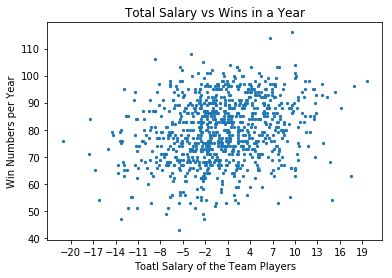

In [221]:
plt.scatter(combined_salaries_wins['normalized_salaries'], combined_salaries_wins['W'], s=5 )
plt.title('Total Normalized Salary vs Wins in a Year')
plt.xlabel('Total Salary of the Team Players')
plt.ylabel('Win Numbers per Year')
plt.xticks(np.arange(-20, 20, 3))
plt.show()

There exist no clear evidence to support the idea that 'there exist a posive relationship between cost of team and the team's winning rate'.

## Conclusion

The baseball data set is really huge and several more investigations may be made. Two important conclusion was that there exist huge differences between salaries. Although lower paid players do not differentiate within each other a lot, there exist huge variance within highest paid players.
Another important implication was that there exist not a direct relationship between high cost teams and their winning rates.

## References

I have benefited from [stackoverflow](https://stackoverflow.com) for missing data analysis and advanced merging methods to understand the sytax of pd.merge and is_null functions. I have also benefited from [Matplotlib](https://matplotlib.org) for visualizations, and [Pandas Website](https://pandas.pydata.org/pandas-docs/stable/10min.html) for several pandas functions.